# Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset("penguins")

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: >

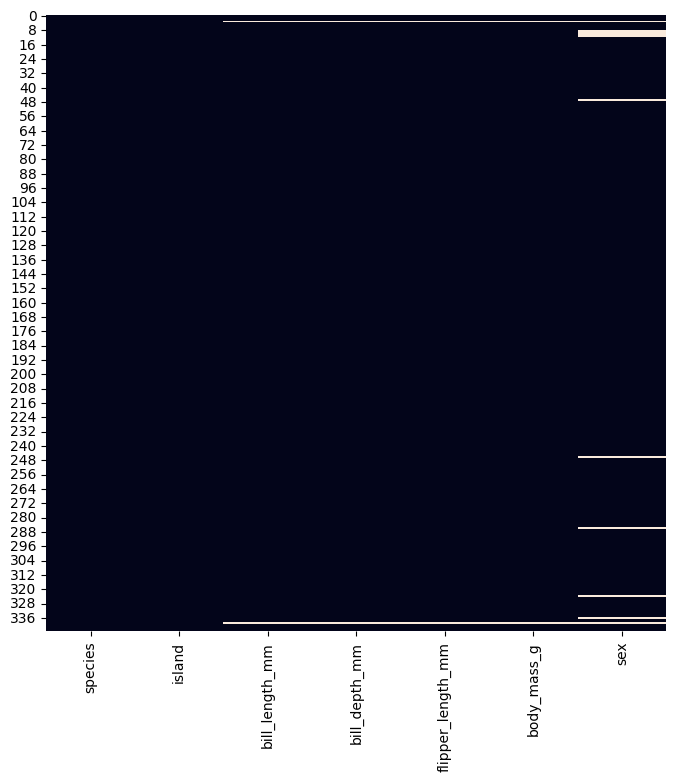

In [5]:
plt.figure(figsize=(8, 8))
 
sns.heatmap(df.isna(), cbar=None)

In [6]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
df = df.dropna()

# Separate ML Data / Prod Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_ml, df_prod = train_test_split(
    df,
    shuffle=True,
    train_size=2/3,
    stratify=df.species,
    random_state=42
)

In [10]:
# Sanity check
len(df_ml), len(df_prod)

(222, 111)

# ML

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

## Train

In [12]:
X = df_ml.copy()
y = X.pop("species")

In [13]:
# train-test-split
X_train, X_test, y_train, y_test = \
    train_test_split(
        X, y,
        train_size=2/3,
        stratify=y,
        random_state=42
    )

In [14]:
len(X_train), len(X_test)

(148, 74)

# Label Encoding

In [15]:
lab_enc = LabelEncoder()

y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.transform(y_test)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 327 to 70
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             222 non-null    object 
 1   bill_length_mm     222 non-null    float64
 2   bill_depth_mm      222 non-null    float64
 3   flipper_length_mm  222 non-null    float64
 4   body_mass_g        222 non-null    float64
 5   sex                222 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.1+ KB


In [17]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns
# cat_cols, num_cols

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ]
)

In [19]:
rfc = RandomForestClassifier()

In [20]:
pipe = make_pipeline(preprocessor, rfc)

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [22]:
pipe.score(X_test, y_test)

1.0